# Qualitative Visuals for 1D Data

## Loading Libraries and Data

**Load libraries**

In [0]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [0]:
!pip install --upgrade -q gspread

from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

**Load datasets**

In [0]:
def get_df(file_name, location):
  worksheet = gc.open('Sales').get_worksheet(location)
  rows = worksheet.get_all_values()
  head = rows[0]
  data = rows[1:]
  df = pd.DataFrame.from_records(data, columns=head)
  return df

In [0]:
employees = get_df('Sales', 0)
customers = get_df('Sales', 1)
products = get_df('Sales', 2)
orders = get_df('Sales', 3)
suppliers = get_df('Sales', 4)

**Clean data**

In [0]:
def missing_fields(df, field):
  dict_department_names = {'': 'Other', 'N/A': 'Other', None: 'Other', ' ': 'Other'}
  new_df = df[field].map(dict_department_names)
  df.update(new_df)
  return df

In [0]:
employees = missing_fields(employees, 'Department')
products = missing_fields(products, 'Supplier Name')
suppliers = missing_fields(suppliers, 'Name')

In [0]:
def update_city_names(df, field, city_proper, city_names):
  dict_city_names = {}
  for city in city_names:
    dict_city_names[city] = city_proper
  new_df = df[field].map(dict_city_names)
  df.update(new_df)
  return df

In [0]:
sf = 'San Francisco'
sf_names = ["SAN FRANCISCO", "SANFRANCISCO", "SANFRANCISCO,CA", "SF", "sf", "FRISCO", "Frisco"]
oak = 'Oakland'
oak_names = ["OAKLAND", "oakland", "Oak Town"]
sj = 'San Jose'
sj_names = ["SAN JOSE", "san jose", "SANJOSE", "SANJOSE,CA", "SJ", "sj", "Jose"]

In [0]:
employees = update_city_names(employees, 'City', sf, sf_names)
employees = update_city_names(employees, 'City', oak, oak_names)
employees = update_city_names(employees, 'City', sj, sj_names)

In [0]:
customers = update_city_names(customers, 'City', sf, sf_names)
customers = update_city_names(customers, 'City', oak, oak_names)
customers = update_city_names(customers, 'City', sj, sj_names)

In [0]:
suppliers = update_city_names(suppliers, 'City', sf, sf_names)
suppliers = update_city_names(suppliers, 'City', oak, oak_names)
suppliers = update_city_names(suppliers, 'City', sj, sj_names)

## Pie Chart

In [0]:
labels = 'A', 'B', 'C', 'D'
freq = [5,10,9,3]

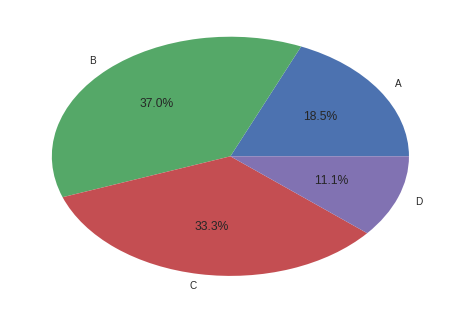

In [61]:
fig, ax = plt.subplots()
ax.pie(freq, labels=labels, autopct='%1.1f%%')
plt.show()

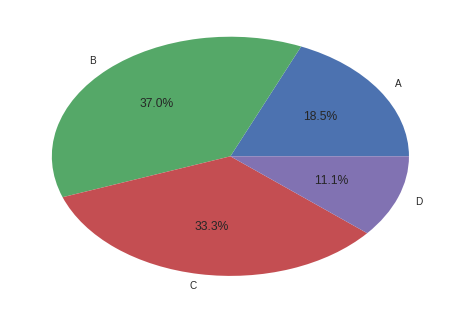

In [62]:
plt.pie(freq, labels=labels, autopct='%1.1f%%')
plt.show()

**Frequency of departments for employees**

In [0]:
department_table = employees['Department'].value_counts()
department_names = department_table.index
department_freq = (1.0*department_table.values)/department_table.sum()

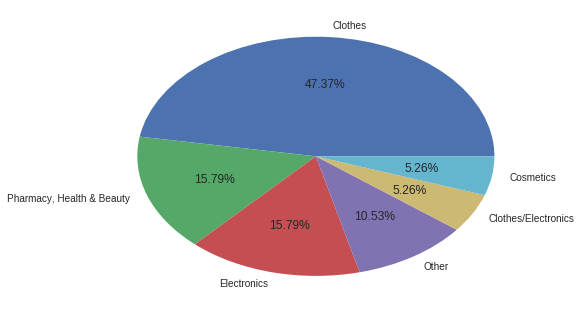

In [64]:
plt.pie(department_freq, labels=department_names, autopct='%1.2f%%')
plt.show()

**Cities customers live**

In [0]:
city_table = customers['City'].value_counts()
city_names = city_table.index
city_freq = (1.0*city_table.values)/city_table.sum()

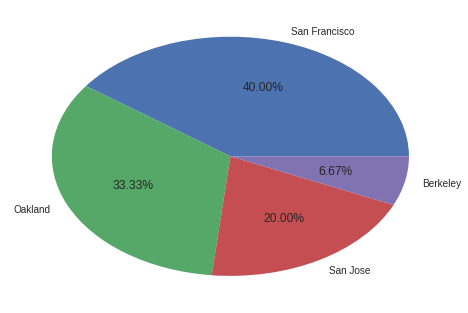

In [66]:
plt.pie(city_freq, labels=city_names, autopct='%1.2f%%')
plt.show()

## Bar Graph

In [0]:
rain_avg = (18, 23, 28, 33, 32, 25, 21)
rain_std = (3, 2, 4, 1, 3, 2, 1)

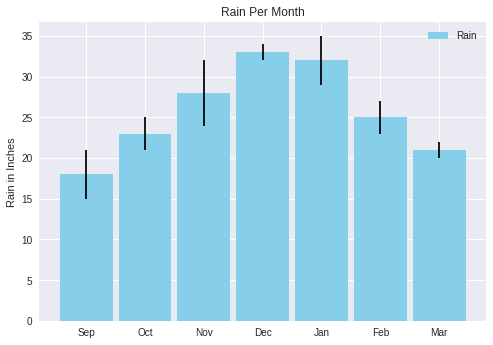

In [71]:
ind = np.arange(len(rain_avg))
width = 0.9
fig, ax = plt.subplots()
ax.bar(ind, rain_avg, width, yerr=rain_std, color='SkyBlue', label='Rain')
ax.set_ylabel('Rain in Inches')
ax.set_title('Rain Per Month')
ax.set_xticks(ind)
ax.set_xticklabels(('Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar'))
ax.legend()
plt.show()

**Number of products offered by supplier**

In [0]:
product_supplier_df = pd.merge(products, suppliers, how='left').drop_duplicates()
product_supplier_table = product_supplier_df['Supplier Name'].value_counts()
supplier_names = product_supplier_table.index
supplier_freq = product_supplier_table.values

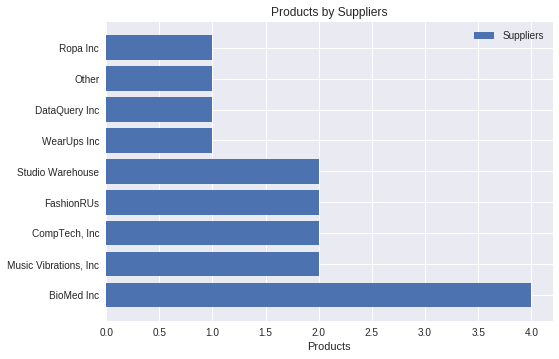

In [75]:
ind = np.arange(len(supplier_freq))
width = 0.8
fig, ax = plt.subplots()
ax.barh(ind, supplier_freq, width, label='Suppliers')
ax.set_xlabel('Products')
ax.set_title('Products by Suppliers')
ax.set_yticks(ind)
ax.set_yticklabels(supplier_names)
ax.legend()
plt.show()

# Qualitative Visuals for 2D Data

## Side-by-side Pie Charts

In [0]:
from matplotlib.gridspec import GridSpec

In [0]:
labels1 = 'A', 'B', 'C', 'D'
freq1 = [5, 10, 9, 3]
labels2 = 'A', 'B', 'C', 'D'
freq2 = [6, 7, 4, 2]

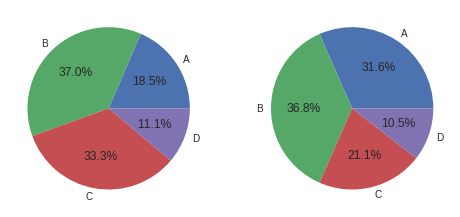

In [78]:
the_grid = GridSpec(1, 2)
plt.subplot(the_grid[0, 0], aspect=1)
plt.pie(freq1, labels=labels1, autopct='%1.1f%%')
plt.subplot(the_grid[0, 1], aspect=1)
plt.pie(freq2, labels=labels2, autopct='%1.1f%%')
plt.show()

**Departments per city**

In [0]:
city_department_df = employees.groupby(['City', 'Department'])['Department'].count()
sf_departs = city_department_df.loc['San Francisco']
oak_departs = city_department_df.loc['Oakland']
sj_departs = city_department_df.loc['San Jose']

In [0]:
sf_department_names = sf_departs.index
oak_department_names = oak_departs.index
sj_department_names = sj_departs.index

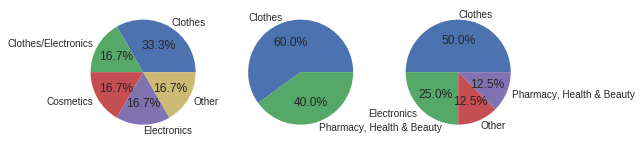

In [86]:
the_grid = GridSpec(1, 3)
plt.subplot(the_grid[0, 0], aspect=1)
plt.pie(sf_departs, labels=sf_department_names, autopct='%1.1f%%')
plt.subplot(the_grid[0, 1], aspect=1)
plt.pie(oak_departs, labels=oak_department_names, autopct='%1.1f%%')
plt.subplot(the_grid[0, 2], aspect=1)
plt.pie(sj_departs, labels=sj_department_names, autopct='%1.1f%%')
plt.show()

## Side-by-side Bar Graphs

In [0]:
sales17 = np.array([2921, 3178, 3721, 1126, 986, 1323, 2105])
sales18 = np.array([1761, 2185, 4821, 1942, 1346, 1689, 2632])

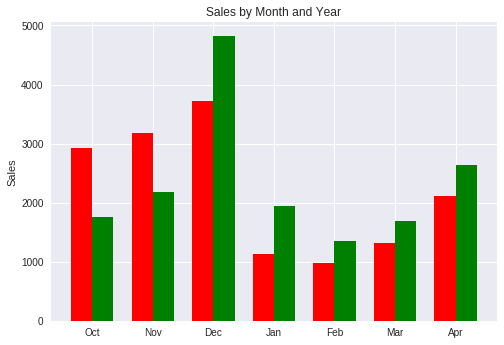

In [89]:
ind = np.arange(len(sales17))
width = 0.35

fig, ax = plt.subplots()
ax.bar(ind, sales17, width, color='r')
ax.bar(ind + width, sales18, width, color='g')
ax.set_ylabel('Sales')
ax.set_title('Sales by Month and Year')
ax.set_xticks(ind + width/2)
ax.set_xticklabels(('Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr'))
plt.show()

## Stacked Bar Graphs

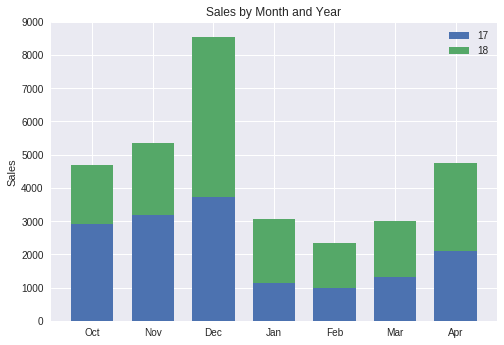

In [90]:
ind = np.arange(len(sales17))
width = 0.7
p1 = plt.bar(ind, sales17, width)
p2 = plt.bar(ind, sales18, width, bottom=sales17)
plt.ylabel('Sales')
plt.title('Sales by Month and Year')
plt.xticks(ind, ('Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr'))
plt.yticks(np.arange(0, 10000, 1000))
plt.legend((p1[0], p2[0]), ('17', '18'))
plt.show()

# Quantitative Visuals for 1D Data

## Line Graphs

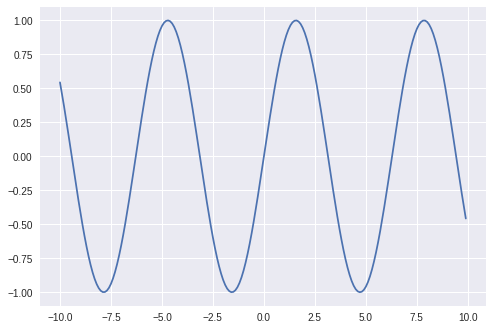

In [92]:
x = np.arange(-10, 10, 0.1)
y = np.sin(x)
plt.plot(x, y)
plt.show()

**Stock prices**

In [0]:
stock_prices = np.array([11, 12, 15, 17, 18, 14, 12, 13, 9, 7, 13, 15, 14, 14, 17, 16, 15, 19, 21, 22, 26, 24, 21, 23, 20, 25, 23, 24, 23, 26, 28])

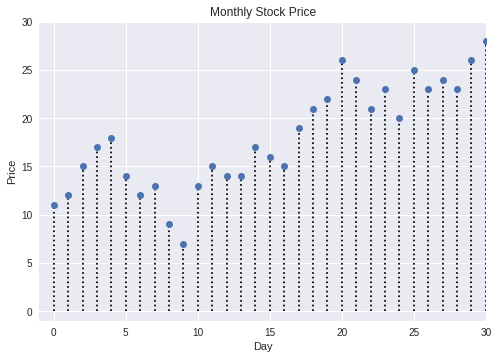

In [96]:
plt.plot(stock_prices, 'o')
plt.axis([-1, 30, -1, 30])
plt.ylabel('Price')
plt.xlabel('Day')
plt.title('Monthly Stock Price')
plt.vlines(np.arange(31), [0], stock_prices, linestyles='dotted')
plt.show()

## Histogram

In [0]:
mu = 0
sigma = 10
x = mu + sigma*np.random.randn(10000)

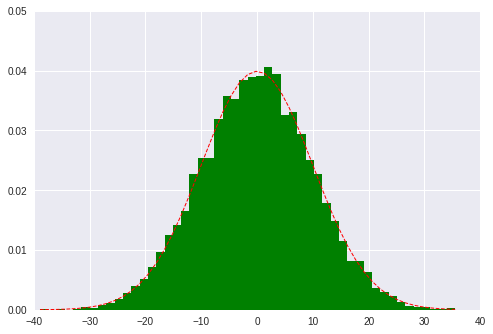

In [104]:
import matplotlib.mlab as mlab

n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green')

y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.axis([-40, 40, 0, 0.05])
plt.show()

## Box Plot

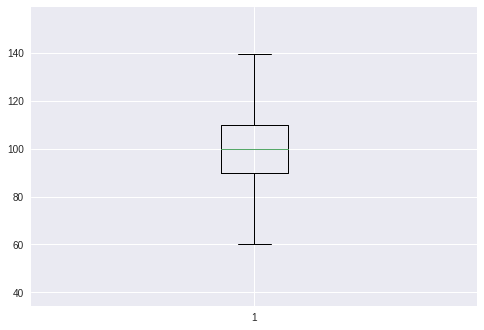

In [105]:
mu = 100
sigma = 15
x = mu + sigma*np.random.randn(10000)
plt.boxplot(x)
plt.show()

# Quantitative Visuals for 2D Data

## Line Graphs

In [0]:
stock_prices_A = stock_prices
stock_prices_B = np.array([13, 15, 14, 19, 21, 11, 10, 13, 9, 11, 12, 16, 17, 15, 18, 21, 22, 21, 21, 19, 22, 24, 25, 24, 26, 23, 25, 24, 27, 26, 28])

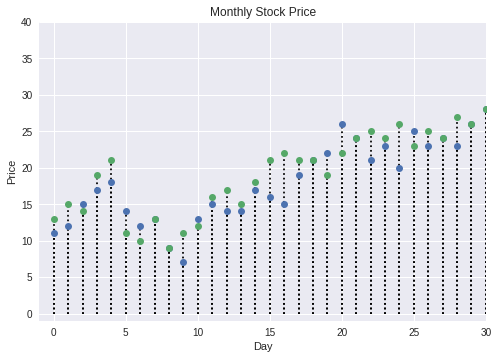

In [113]:
plt.plot(stock_prices_A, 'o')
plt.plot(stock_prices_B, 'o')
plt.axis([-1, 30, -1, 40])
plt.ylabel('Price')
plt.xlabel('Day')
plt.title('Monthly Stock Price')
#xticks = np.arange(0, 32, 2)
#plt.xticks(xticks)
plt.vlines(np.arange(31), [0], stock_prices_A, linestyles='dotted')
plt.vlines(np.arange(31), [0], stock_prices_B, linestyles='dotted')
plt.show()

## Scatter Plot

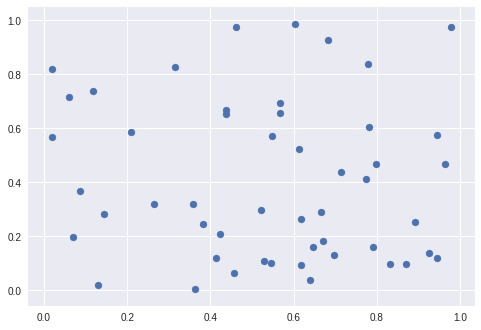

In [114]:
np.random.seed(0)
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
plt.scatter(x, y)
plt.show()

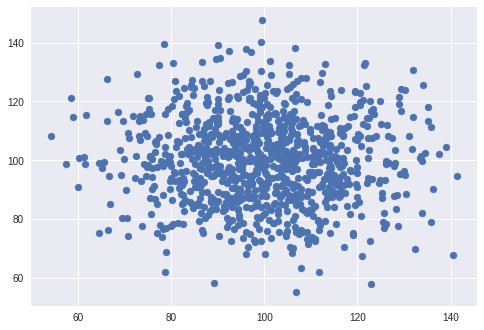

In [116]:
np.random.seed(0)
mu = 100
sigma = 15
x = mu + sigma*np.random.randn(1000)
y = mu + sigma*np.random.randn(1000)
plt.scatter(x, y)
plt.show()

## Stacked Area Charts

In [0]:
product_A = np.array([10, 11, 8, 14, 9, 13, 16, 19, 24, 21, 23, 14, 13, 16])
product_B = np.array([11, 14, 10, 15, 12, 15, 17, 20, 23, 21, 20, 22, 23, 24])

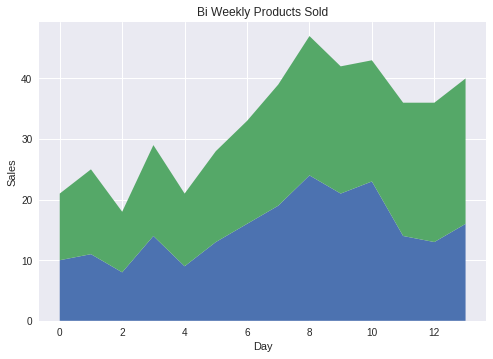

In [118]:
y = np.row_stack((product_A, product_B))
x = np.arange(14)

fig, ax = plt.subplots()
ax.stackplot(x, y)
plt.ylabel('Sales')
plt.xlabel('Day')
plt.title('Bi Weekly Products Sold')
plt.show()

**Stacked sales by month and year**

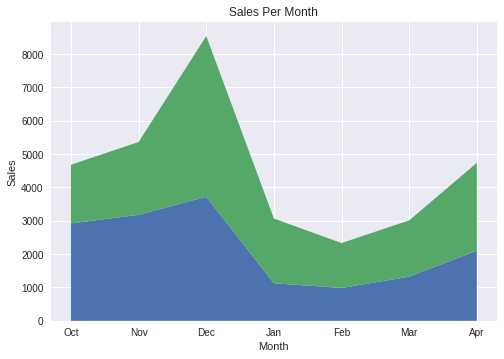

In [119]:
fig, ax = plt.subplots()
y = np.row_stack((sales17, sales18))
x = np.arange(len(sales17))
ax.stackplot(x, y)
plt.ylabel('Sales')
plt.xlabel('Month')
plt.xticks([0,1,2,3,4,5,6], ('Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr'))
plt.title('Sales Per Month')
plt.show()